<a href="https://colab.research.google.com/github/cown0211/boostcourse/blob/main/DataScienceWithPython/4_%EA%B1%B4%EA%B0%95%EA%B2%80%EC%A7%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C_%EA%B0%80%EC%84%A4%EA%B2%80%EC%A0%95%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# 시각화시 한글폰트 깨짐 방지

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 셀 실행 후 런타임 재실행

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,234 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

# 1) 가설 세우기



데이터 분석을 하기 위해서는 어떤 문제를 알아볼 것인지 가설을 세워야 합니다. 예시로 2개의 가설을 세워보겠습니다.


첫번째, 음주 여부는 건강검진 수치와 차이가 있을까요?



두번째, 신장 또는 허리둘레의 크기가 체중가 상관관계가 있을까요?



한번 알아보겠습니다.

## 4.1 라이브러리 로드하고 한글폰트 설정하기

### 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 한글 폰트 설정

In [1]:
import matplotlib.pyplot as plt

# Windows의 한글폰트 설정
plt.rc("font", family = "NanumBarunGothic")

# Mac의 한글폰트 설정
# plt.rc("font", family = "AppleGothic")

# 음수기호(-) 제대로 표기하기 위한 코드
plt.rc("axes", unicode_minus = False)

# 폰트 선명하게 보이도록
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 4.2 데이터셋 소개와 로드하기 - 가설세우기


*   최신 데이터: https://www.data.go.kr/data/15007122/fileData.do

*   2017 데이터: https://www.boostcourse.org/downloadFile/fileDownload?attachmentId=4516646&autoClose=true





In [3]:
# 다운로드 받은 파일을 판다스의 read_csv로 읽어옵니다.
# 파일을 읽어온 후 shape로 행과 열의 수를 출력합니다. 

df = pd.read_csv("/content/drive/MyDrive/boostcourse/DataScienceWithPython/NHIS_OPEN_GJ_2017.CSV", encoding = "cp949")
df.shape

(1000000, 34)

### 데이터 미리보기

In [4]:
# sample, haed, tail을 통해 데이터 미리보기
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [5]:
df.tail()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999995,2017,999996,2,9,41,165.0,55.0,70.0,1.5,1.5,...,11.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999996,2017,999997,2,9,11,165.0,50.0,68.0,1.2,1.5,...,11.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999997,2017,999998,2,12,27,155.0,50.0,83.8,0.2,1.0,...,12.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
999998,2017,999999,1,11,47,160.0,70.0,99.0,0.8,0.9,...,35.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
999999,2017,1000000,2,9,27,165.0,60.0,74.0,1.2,1.2,...,15.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [6]:
# sample 메서드는 무작위로 1개만 뽑아냄
df.sample()
# n=x 조건으로 x개 뽑아낼 수 있음

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
59309,2017,59310,1,8,41,170.0,75.0,84.8,0.7,0.8,...,37.0,1.0,1.0,1,NaN,NaN,NaN,NaN,1.0,20181126


### 기본 정보 보기

In [7]:
# .info() 메서드로 데이터의 크기, 형식, 메모리 사용량을 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [8]:
# .columns로 컬럼만 따로 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [9]:
# .dtypes 메서드로 데이터 타입만 출력
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

# 2) 데이터 그룹화와 연산하기

## 4.3 로드한 데이터의 결측치를 보고 요약, 집계하기 - info, isnull, value_counts

### 결측치 보기

In [10]:
# .isnull()을 통해 결측치를 bool 값으로 표시하고 .sum()으로 컬럼 별로 결측치 수를 반환
df.isnull()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


In [11]:
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [12]:
# .isna()도 isnull()과 기능 비슷
df.isna()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False
999996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,False,False
999998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,False


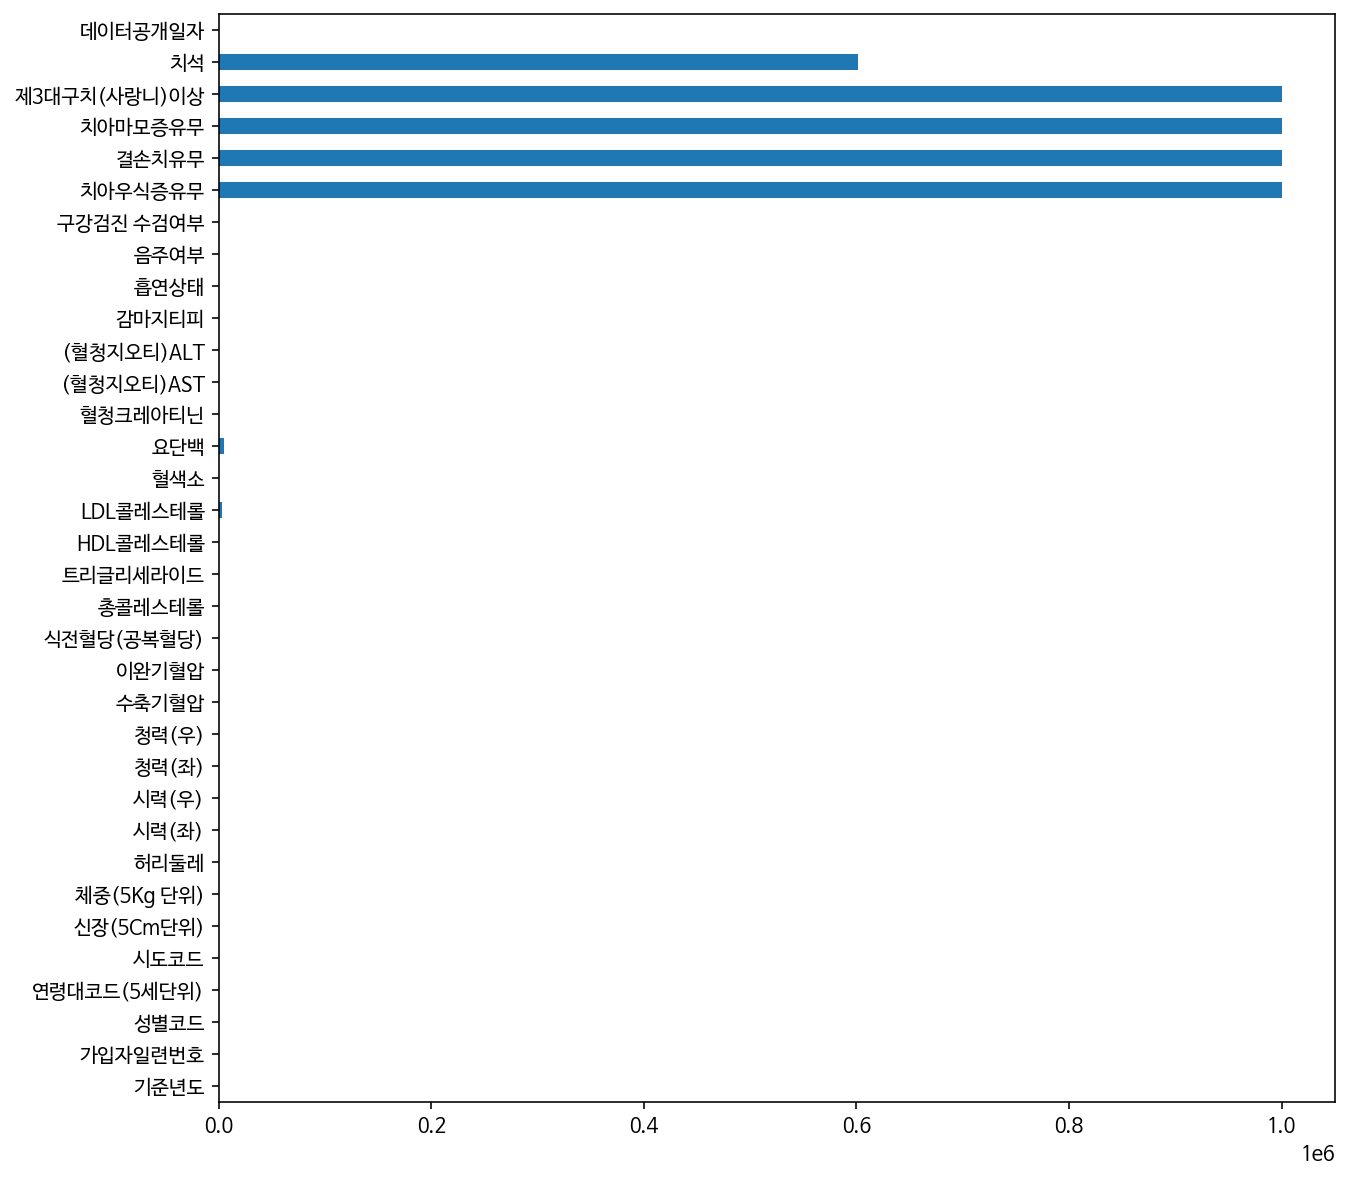

In [14]:
# 판다스 plot으로 시각화
df.isnull().sum().plot.barh(figsize = (10,10))

### 일부 데이터 요약하기

In [27]:
# (혈청지오티)ALT, (혈청지오티)AST를 가져와 미리보기 합니다.
df["(혈청지오티)ALT"]
# 대괄호 하나만 감싸면 Series 형태

0         41.0
1         13.0
2         62.0
3         24.0
4         62.0
          ... 
999995    11.0
999996    11.0
999997    13.0
999998    30.0
999999    20.0
Name: (혈청지오티)ALT, Length: 1000000, dtype: float64

In [28]:
df[["(혈청지오티)ALT"]]
# 대괄호 2개로 감싸면 DataFrame 형태

,(혈청지오티)ALT
0,41.0
1,13.0
2,62.0
3,24.0
4,62.0
...,...
999995,11.0
999996,11.0
999997,13.0
999998,30.0


In [29]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]]
# 2개 이상 컬럼 가져오려면 무조건 list 형태로 

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0
...,...,...
999995,11.0,18.0
999996,11.0,21.0
999997,13.0,23.0
999998,30.0,28.0


In [23]:
df.loc[:, ["(혈청지오티)ALT", "(혈청지오티)AST"]]

,(혈청지오티)ALT,(혈청지오티)AST
0,41.0,19.0
1,13.0,16.0
2,62.0,45.0
3,24.0,21.0
4,62.0,37.0
...,...,...
999995,11.0,18.0
999996,11.0,21.0
999997,13.0,23.0
999998,30.0,28.0


In [31]:
# 2개의 컬럼만 요약
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999956 non-null  float64
 1   (혈청지오티)AST  999958 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [32]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999956.000000,999958.000000
mean,25.859343,26.075068
std,25.814268,24.437136
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,30.000000,28.000000
max,6710.000000,9999.000000


### value_counts로 값 집계하기

In [34]:
# value_counts로 성별코드로 그룹화하고 개수 집계하기
df["성별코드"].value_counts()

# 1==남, 2==여
# 남성이 조금 더 많은 것을 확인

1    531172
2    468828
Name: 성별코드, dtype: int64

In [35]:
# 흡연상태로 그룹화
df["흡연상태"].value_counts()

# 1==비흡연; 3==흡연; 2==금연

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

## 4.4 groupBy와 pivot_table로 다양한 집계 연산 하기

### groupby 사용하기

In [37]:
# 성별코드를 기준으로 개수를 셈
df.groupby(["성별코드"]).count()
# 모든 컬럼에 대한 값 반환

,기준년도,가입자일련번호,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
성별코드,,,,,,,,,,,,,,,,,,,,,
1,531172,531172,531172,531172,531098,531098,531102,531047,531055,531064,...,531154,531120,530976,531172,0,0,0,0,230156,531172
2,468828,468828,468828,468828,468640,468634,468458,468665,468666,468694,...,468801,468720,468499,468828,0,0,0,0,168592,468828


In [38]:
# 특정 열만 반환하도록 할 수도 있음
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [41]:
# 성별코드와 음주여부로 그룹화
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()
# 2개 이상의 그룹 조건을 지정해줄 수 있음

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

In [43]:
# 성별코드와 음주여부로 그룹화하고 감마지티피의 평균 계산
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [44]:
# 그룹화 조건 기준으로 요약 수치 반환
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [48]:
# agg를 통해 원하는 연산만 반환 가능
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

### pivot_table

In [50]:
# 음주여부에 따른 그룹화
df.pivot_table(index = "음주여부")

,(혈청지오티)ALT,(혈청지오티)AST,HDL콜레스테롤,LDL콜레스테롤,가입자일련번호,감마지티피,구강검진 수검여부,기준년도,데이터공개일자,성별코드,...,청력(우),청력(좌),체중(5Kg 단위),총콜레스테롤,치석,트리글리세라이드,허리둘레,혈색소,혈청크레아티닌,흡연상태
음주여부,,,,,,,,,,,,,,,,,,,,,
0.0,24.107862,25.094792,56.161852,114.467632,499800.113284,26.858541,0.358768,2017,20181126,1.651602,...,1.041086,1.042881,60.082827,194.699007,0.573111,122.063887,80.269019,13.748950,0.837132,1.320330
1.0,27.634991,27.069879,57.606351,111.444394,500196.825986,47.745678,0.439257,2017,20181126,1.283686,...,1.020745,1.021758,66.778226,196.346568,0.626153,144.077696,82.484576,14.704997,0.892460,1.896158


In [52]:
# values로 특정 열만 반환
# aggfunc으로 연산 함수 지정 가능
df.pivot_table(index = "음주여부", values = "가입자일련번호", aggfunc = "count")

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


In [53]:
# 음주여부에 따른 감마지티피의 평균 반환
df.pivot_table(index = "음주여부", values = "감마지티피", aggfunc = "mean")

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


In [54]:
# 위와 똑같은 결과 반환
pd.pivot_table(df, index = "음주여부", values = "감마지티피", aggfunc = "mean")

,감마지티피
음주여부,
0.0,26.858541
1.0,47.745678


In [55]:
# 여러 연산결과값 반환
pd.pivot_table(df, index = "음주여부", values = "감마지티피", aggfunc = ["mean", "median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
0.0,26.858541,19.0
1.0,47.745678,30.0


In [56]:
# aggfunc에 describe 지정하면 요악값 반환
pd.pivot_table(df, index = "음주여부", values = "감마지티피", aggfunc = "describe")

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,502698.0,999.0,26.858541,1.0,30.687404
1.0,19.0,30.0,53.0,496732.0,999.0,47.745678,1.0,63.103844


In [58]:
# index에 리스트로 조건 넣으면 그룹 조건 여럿 지정
pd.pivot_table(df, index = ["음주여부", "성별코드"], values = "감마지티피", aggfunc = "describe")

25%   50%   75%     count    max       mean  min        std
음주여부 성별코드                                                              
0.0  1     18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     2     13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
1.0  1     24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
     2     13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

# 3) 데이터 시각화로 가설 검정하기

## 4.5 히스토그램으로 전체 수치 데이터를 한번에 시각화 하기

### 전체 데이터 시각화 하기


*   데이터 개수가 너무 많은 경우라면 groupby or pivot_table로 연산을 한 뒤에 시각화 권장



In [59]:
df.info()
# DataFrame의 모든 컬럼이 수치형으로 이루어짐

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

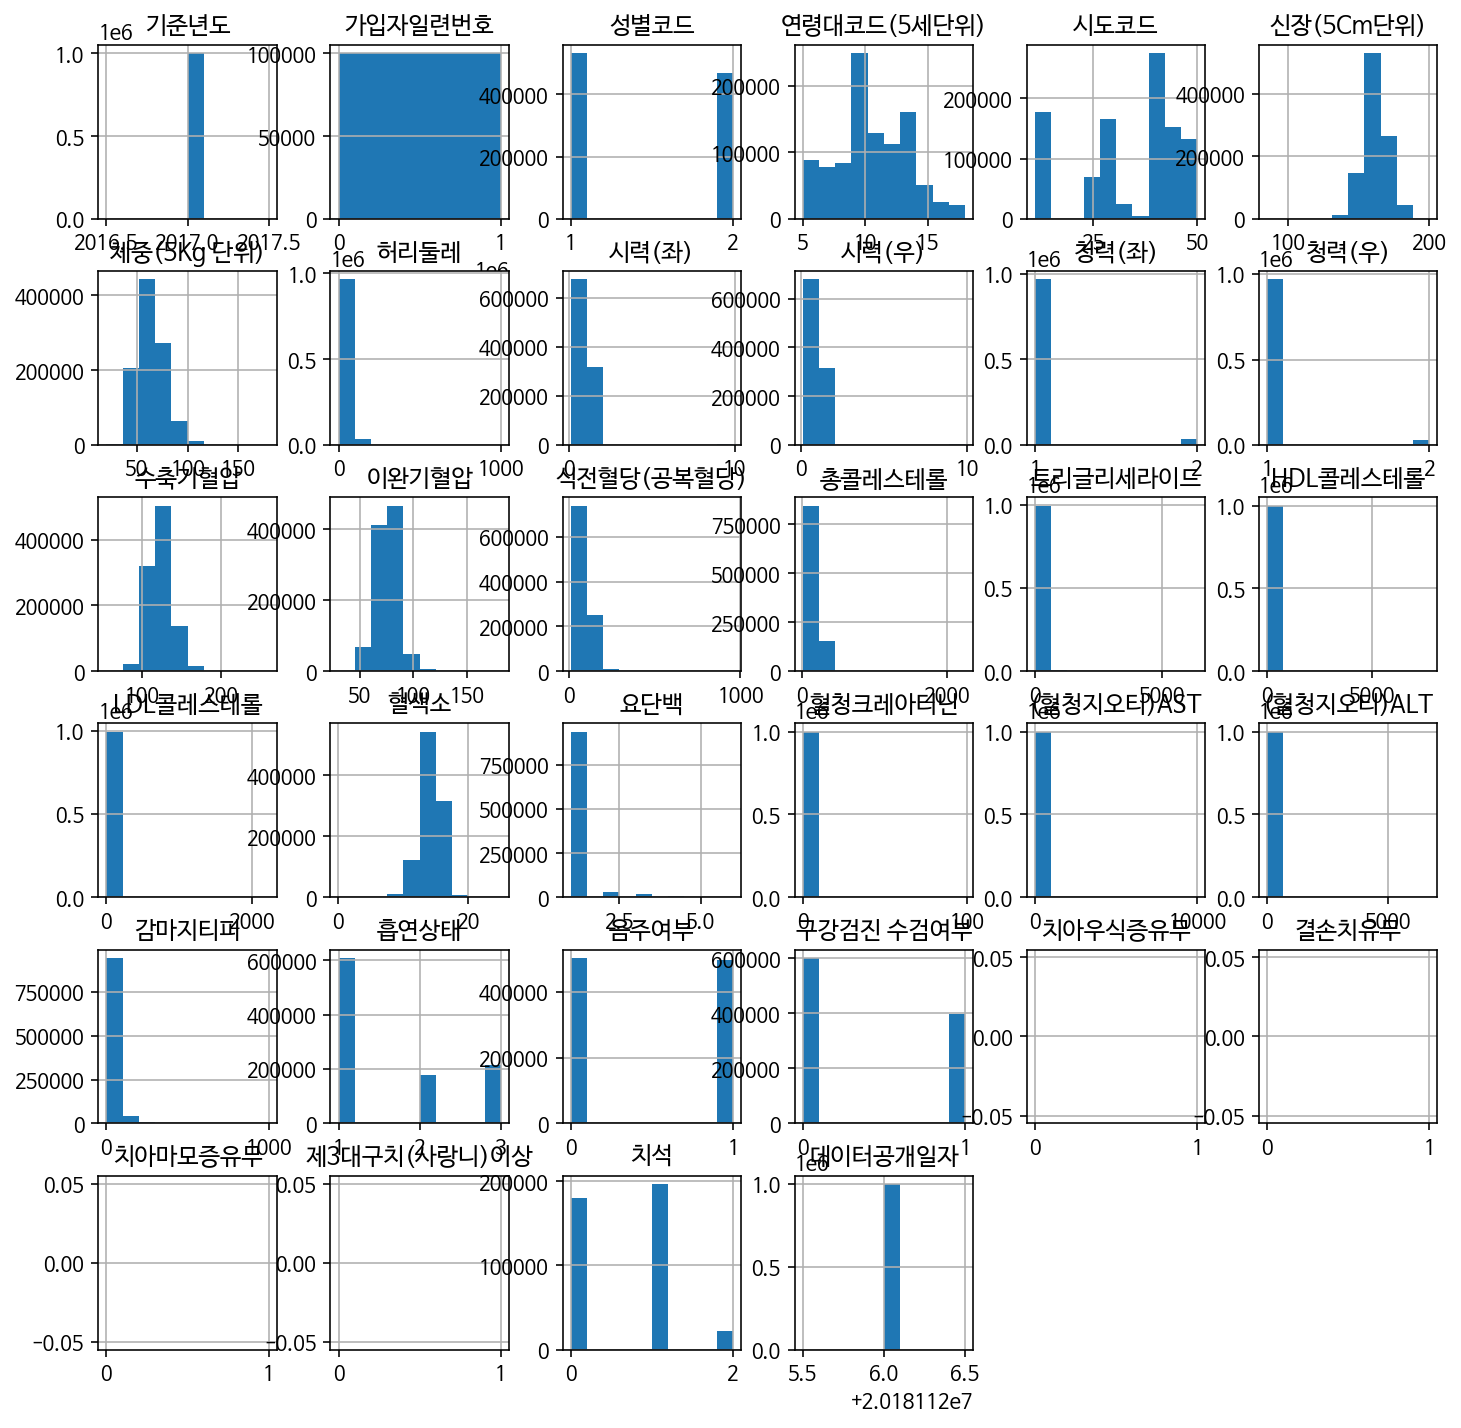

In [61]:
h = df.hist(figsize = (12,12))
# 판다스의 hist로 시각화 -> seaborn보다 연산 빠름
# 변수에 할당하면 그래프 결과만 나타내줌

### 슬라이싱을 사용해 히스토그램 그리기

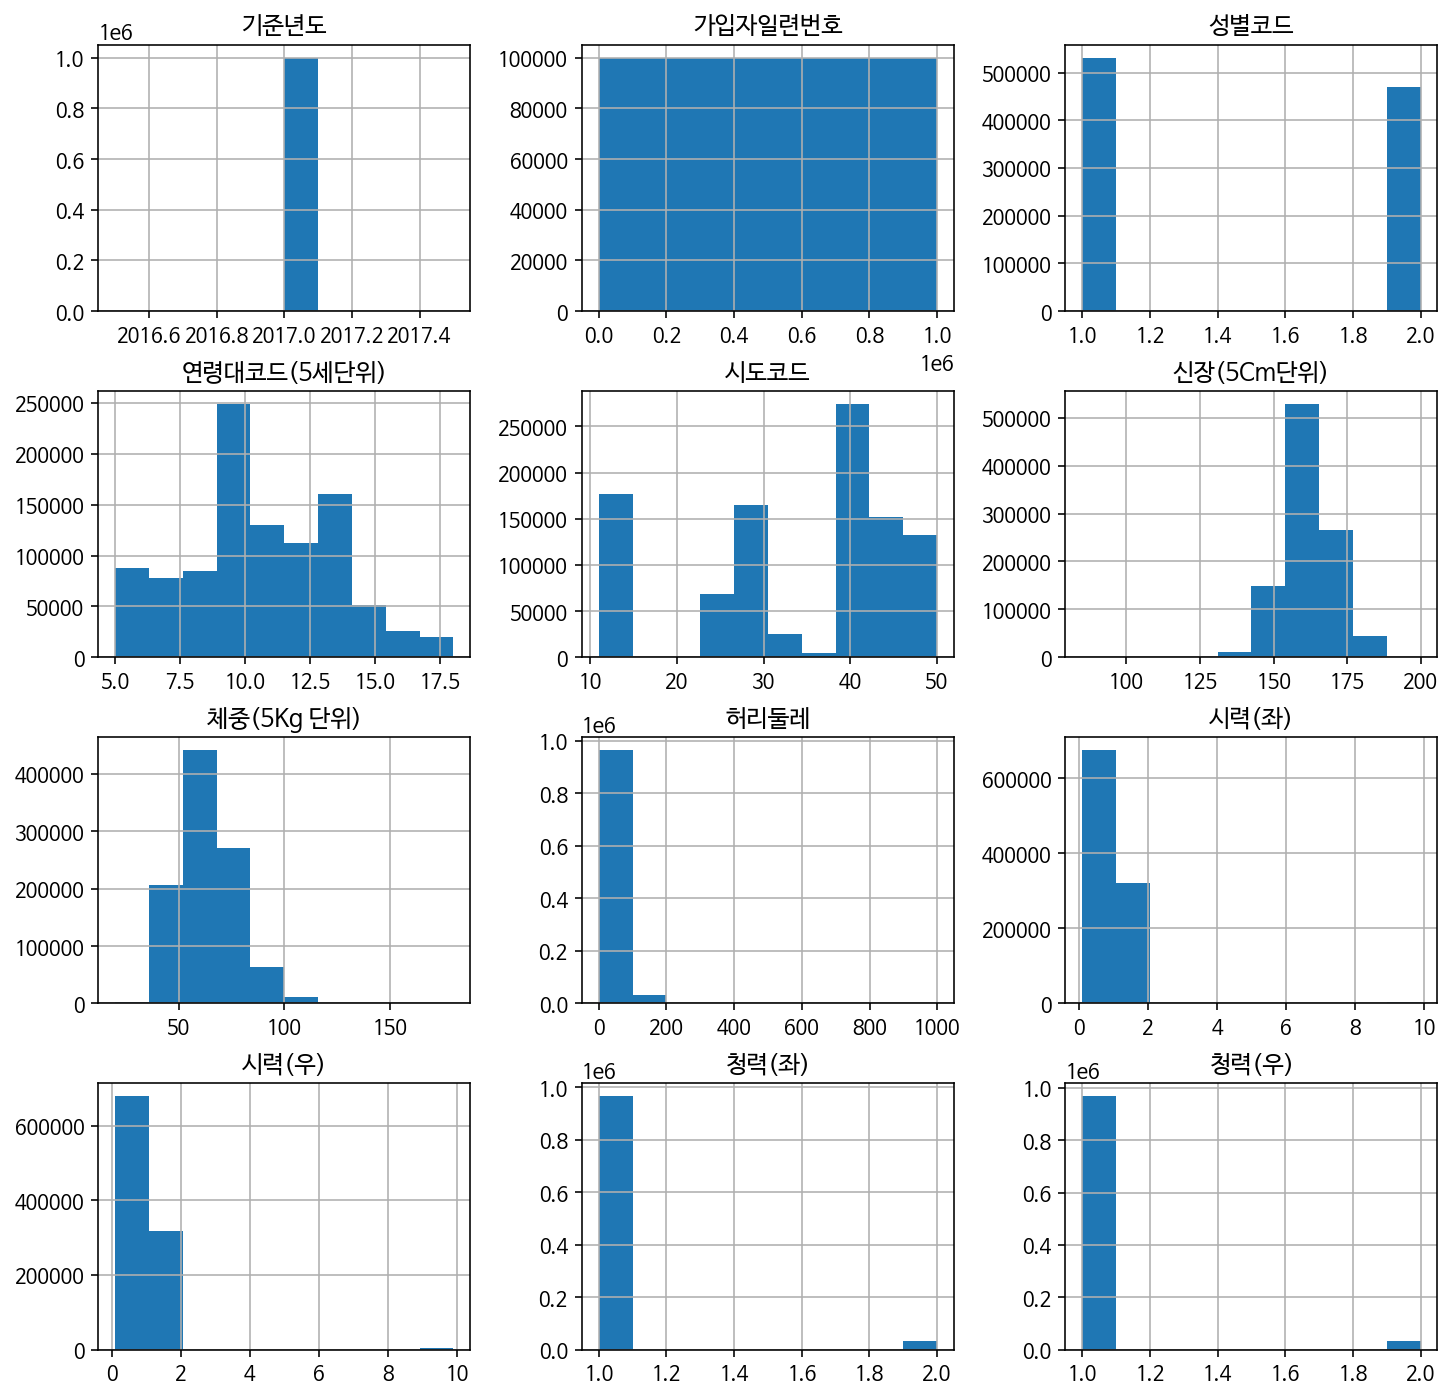

In [65]:
# 슬라이싱을 사용해 앞에서 12개 컬럼을 히스토그램으로 만듦
df.iloc[:, :] # 모든 행,열을 가져옴

h = df.iloc[:, :12].hist(figsize = (12,12))

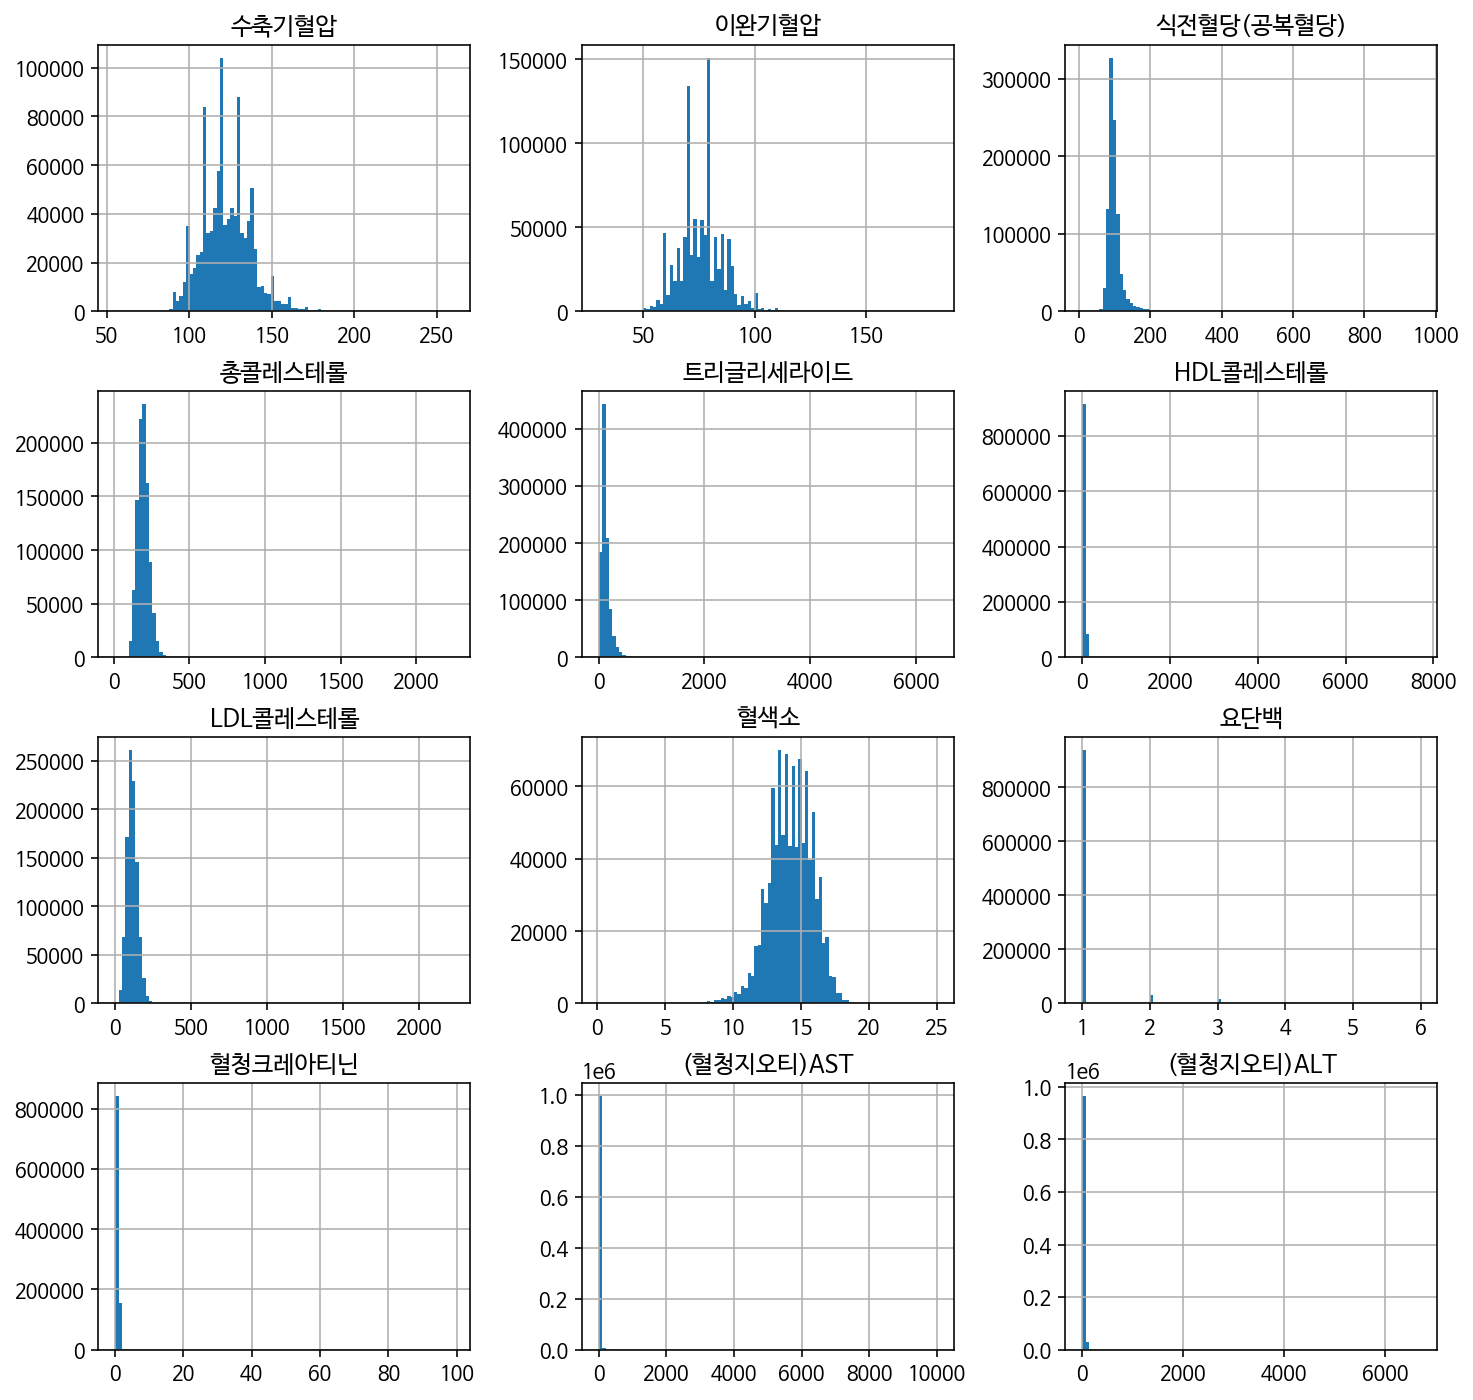

In [70]:
# 슬라이싱을 사용해 12번부터 24까지 컬럼을 히스토그램으로 만듦
df.iloc[:, 12:24] # 모든 행, 12~24열을 가져옴

h = df.iloc[:, 12:24].hist(figsize = (12,12), bins = 100)
# bins 조건으로 막대의 개수를 지정할 수 있음 -> 클수록 막대가 얇아짐

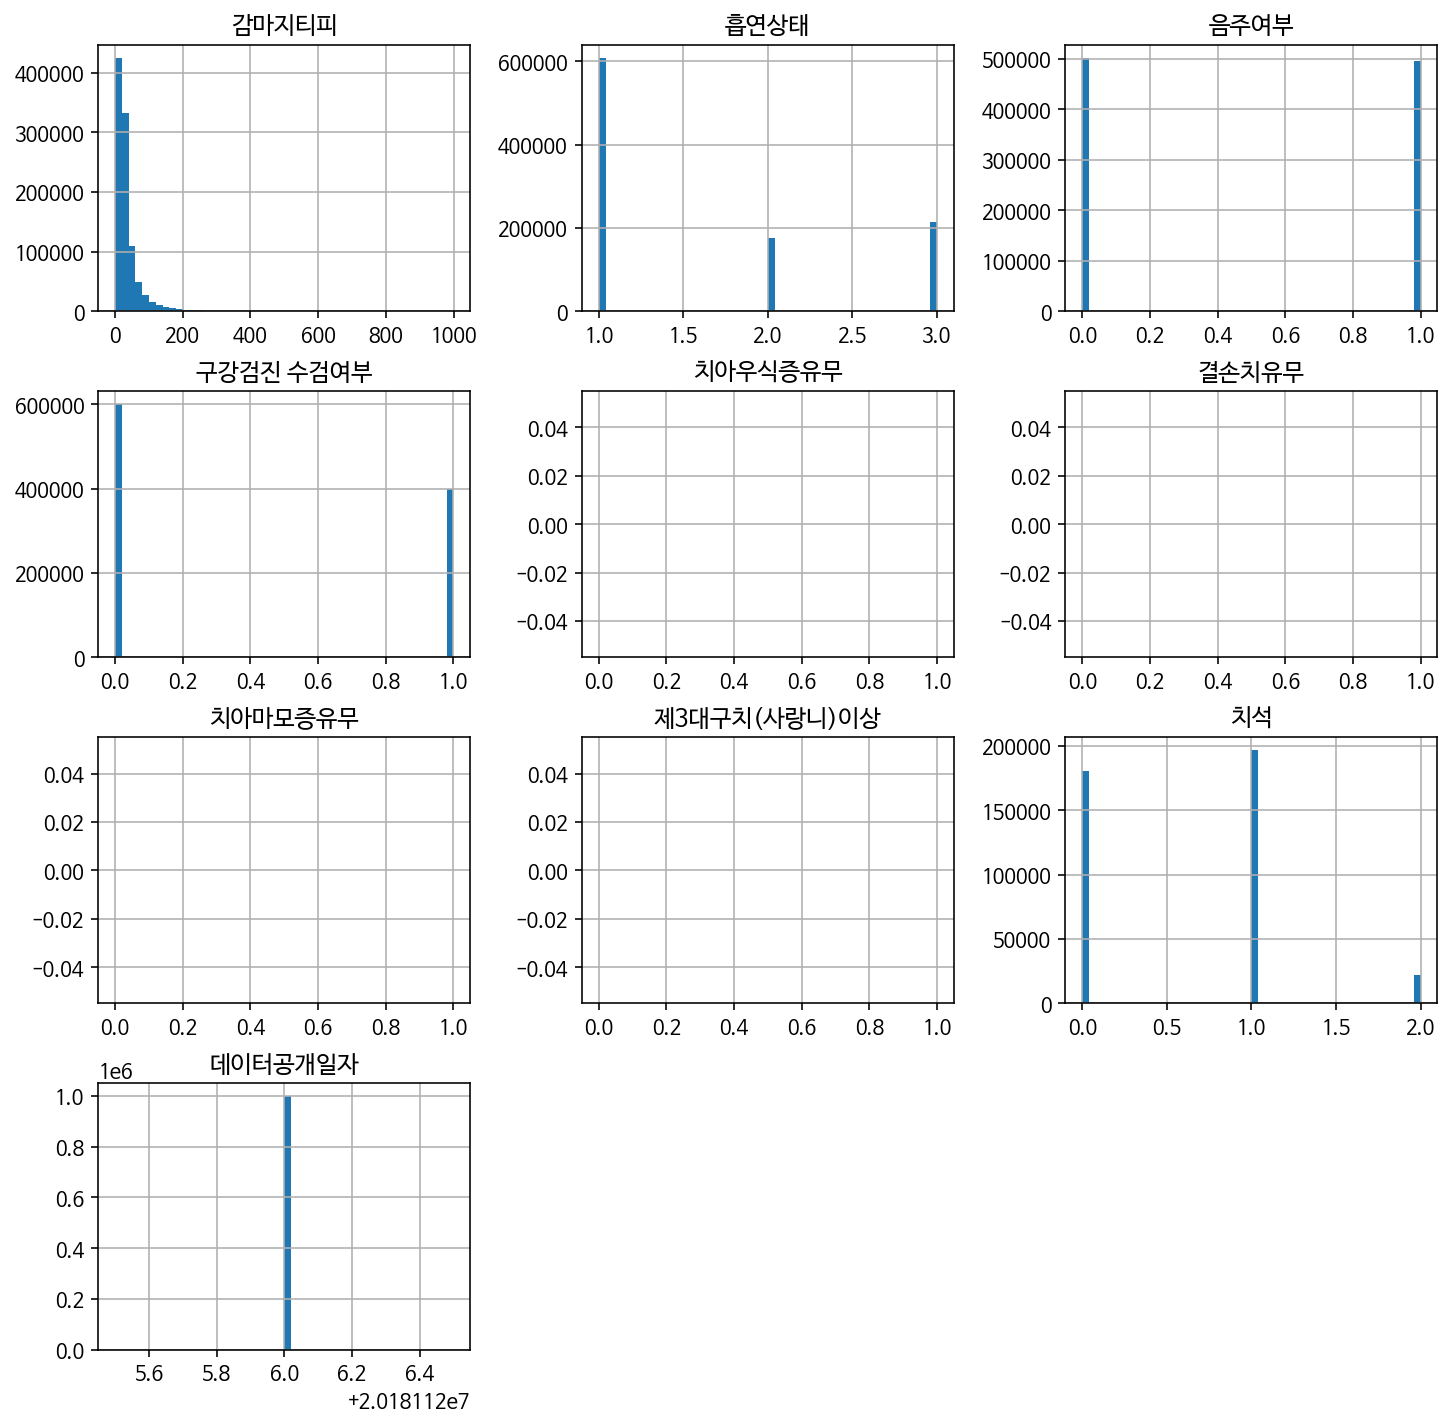

In [72]:
# 24부터 끝까지 슬라이싱
h = df.iloc[:, 24:].hist(figsize = (12,12), bins = 50)

## 4.6 데이터의 빈도수 시각화 하기(막대그래프1) - countplot

### 샘플 데이터 추출

* 데이터 개수가 너무 많으면 먼저 일부를 추출한 뒤에 시각화 하는 것이 연산 빠름

In [76]:
df_sample = df.sample(1000, random_state = 1)
# df에서 1000개의 레코드를 추출
# random_state == seed

df_sample.shape

(1000, 34)

## 범주형 데이터 시각화

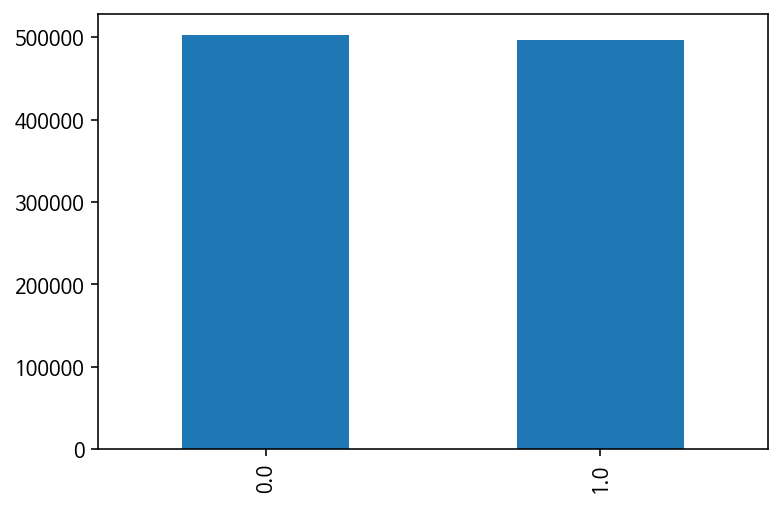

In [80]:
# 음주여부를 판다스로 시각화

df["음주여부"].value_counts().plot.bar()

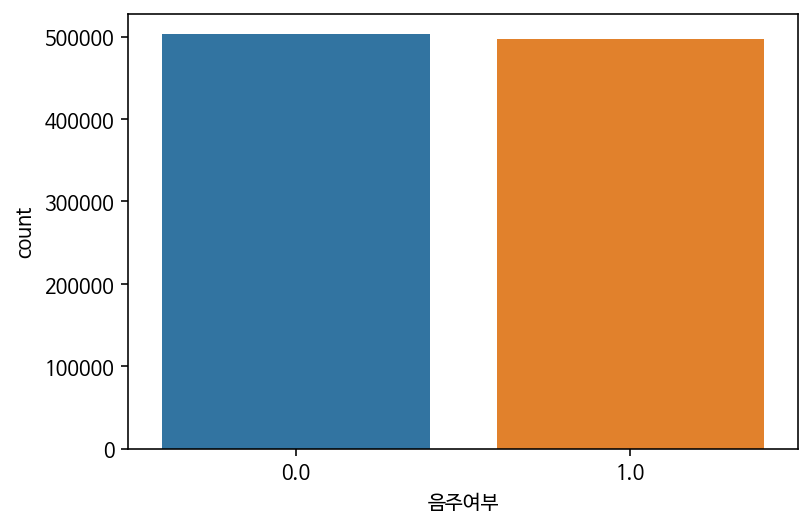

In [83]:
# seaborn으로 시각화
# data로 DataFrame 지정
# x로 x축을 지정

sns.countplot(data = df, x = "음주여부")

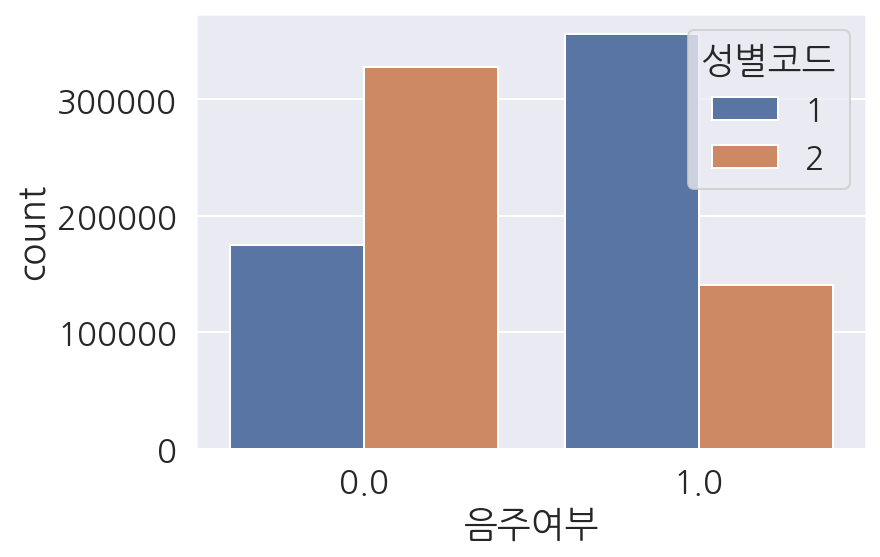

In [90]:
# hue로 성별코드 별로 음주 여부를 시각화

# sns.set(font_scale = 1.5, font = "NanumGothic")
# sns.set으로 스타일 변화 줄 수 있음
sns.countplot(data = df, x = "음주여부", hue = "성별코드")

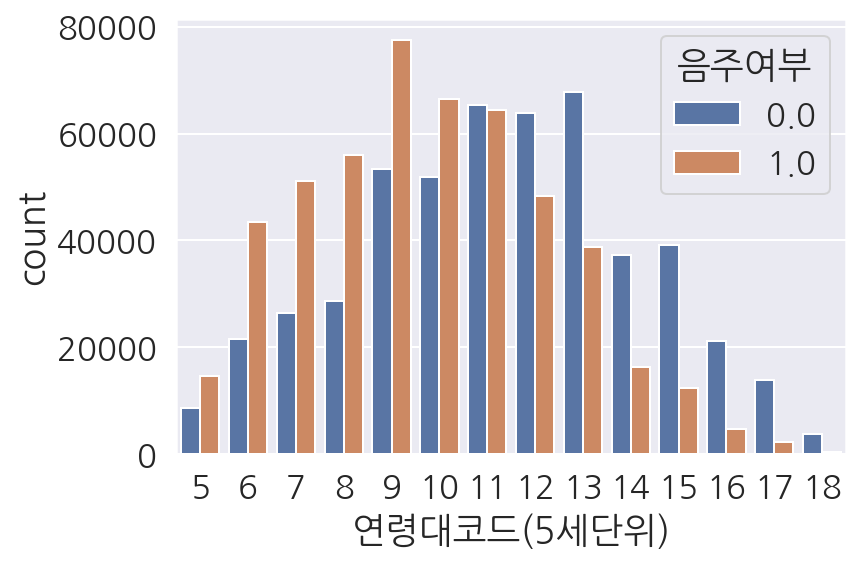

In [95]:
# 연령(5세 단위)에 따른 음주여부 그래프

sns.countplot(data = df, x = "연령대코드(5세단위)", hue = "음주여부")

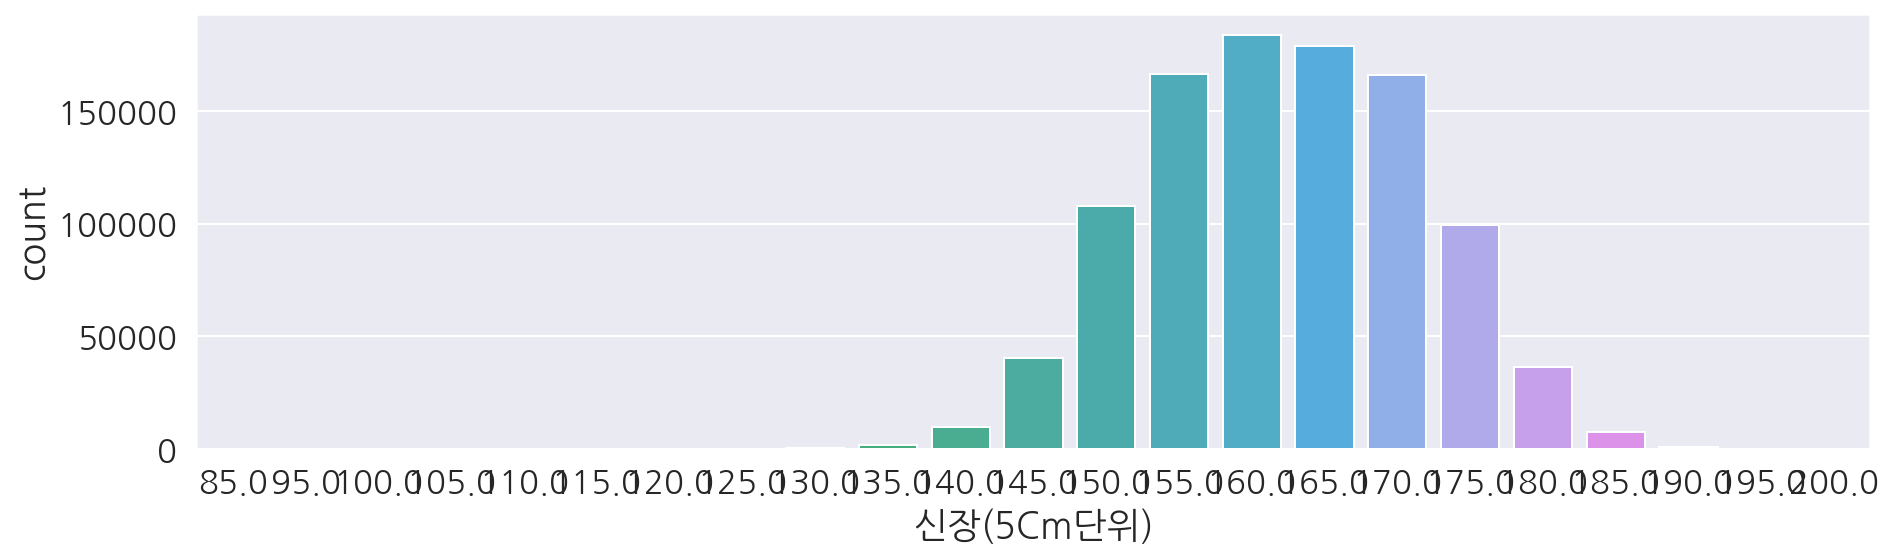

In [99]:
# 신장(5cm) 단위 시각화

plt.figure(figsize = (15,4))  # 그래프 사이즈 조절
sns.countplot(data = df, x = "신장(5Cm단위)")

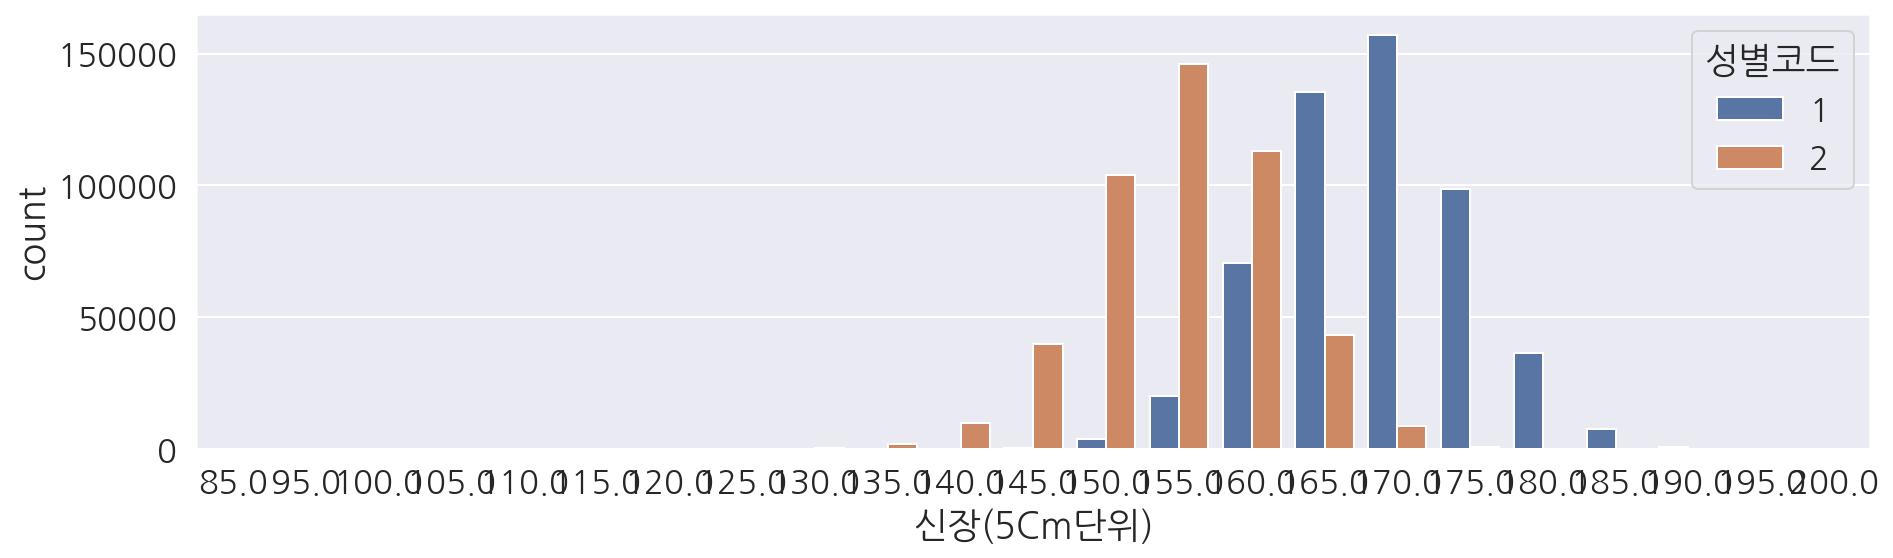

In [106]:
# 성별코드에 따른 신장 시각화

plt.figure(figsize = (15,4))  # 그래프 사이즈 조절
sns.countplot(data = df, x = "신장(5Cm단위)", hue = "성별코드")

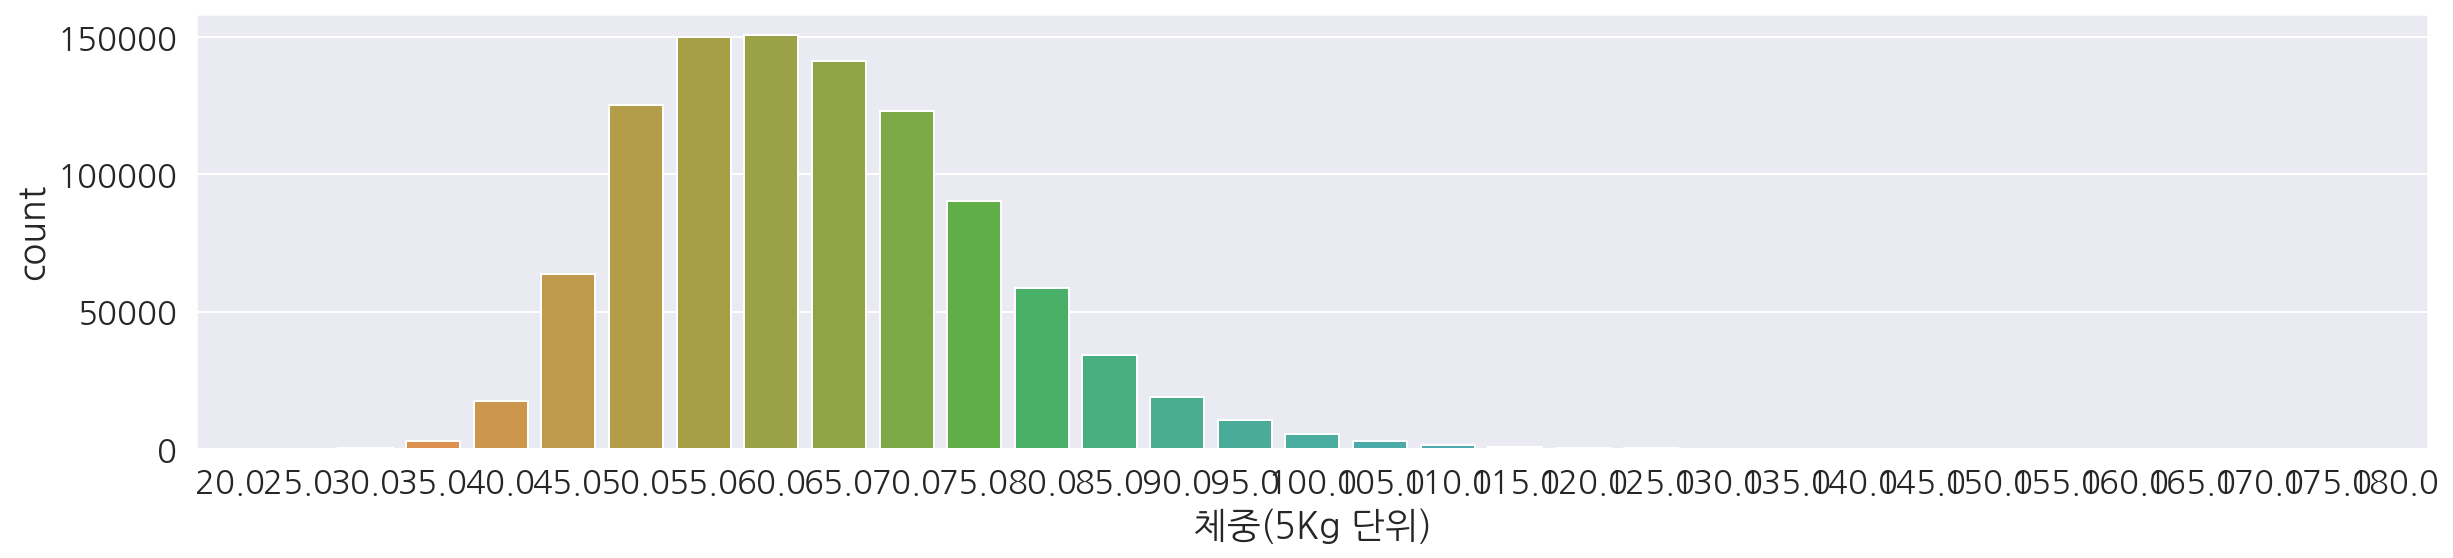

In [105]:
# 체중(5kg) 단위 시각화
plt.figure(figsize = (20,4))  # 그래프 사이즈 조절
sns.countplot(data = df, x = "체중(5Kg 단위)")

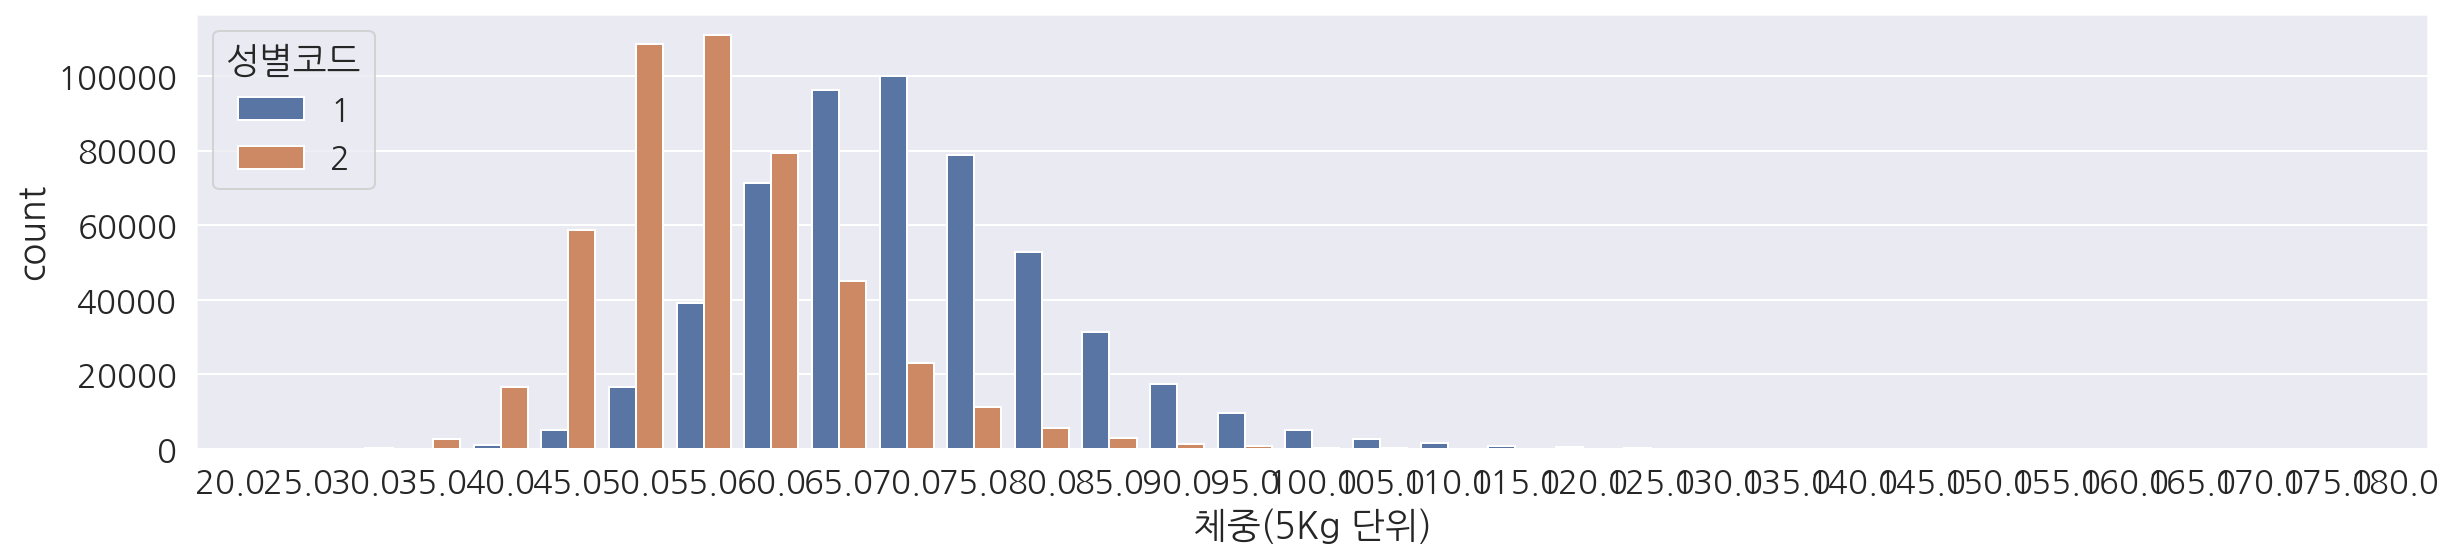

In [107]:
# 체중(5kg) 단위 시각화
plt.figure(figsize = (20,4))  # 그래프 사이즈 조절
sns.countplot(data = df, x = "체중(5Kg 단위)", hue = "성별코드")